<a href="https://colab.research.google.com/github/MarcoGiancola/linear-regression-from-scratch/blob/main/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from Scratch (Gradient Descent + Matrix Formulation)**

## 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("forestfires.csv")

# Display the first rows
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## 2. Select and Normalize Features

In [2]:
# Select the columns of interest
columns_to_normalize = ['wind', 'rain', 'area']

# Apply Min-Max normalization
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Extract numpy arrays
x1 = df['wind'].values
x2 = df['rain'].values
y  = df['area'].values

N = len(df)

#3. Model Formulation

We model the relationship between two independent variables $( x_1, x_2 )$ and a dependent variable  y  as:

$$  y_{\text{pred}} = w_1 x_1 + w_2 x_2 + w_3  $$

Using matrix notation:

$$ W = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix}, \quad X = \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix} $$

$$ y_{\text{pred}} = W^T X $$


# 4. Cost Function (MSE)

In [3]:
def pred(w1, w2, w3):
    return w1 * x1 + w2 * x2 + w3

def loss(w1, w2, w3):
    return (1/N) * (np.linalg.norm(y - pred(w1, w2, w3)))**2

# 5. Gradient Descent Implementation

In [14]:
# Learning rate
lr = 0.01

# Initialize weights
w1 = w2 = w3 = 0.0

# Lists to store history
W1, W2, W3 = [w1], [w2], [w3]
L = [loss(w1, w2, w3)]

# Convergence parameters
err = 1e-4
max_iterations = 500000
iteration_count = 0

# Initialize gradients
d1 = d2 = d3 = 1.0

# Gradient Descent Loop
while (abs(d1) > err or abs(d2) > err or abs(d3) > err) and iteration_count < max_iterations:

    y_pred = pred(w1, w2, w3)
    error = y - y_pred

    # Compute gradients
    d1_grad = np.dot(error, x1)
    d2_grad = np.dot(error, x2)
    d3_grad = np.dot(error, np.ones(N))

    # Update weights
    w1 += 2 * lr * d1_grad / N
    w2 += 2 * lr * d2_grad / N
    w3 += 2 * lr * d3_grad / N

    # Store history
    W1.append(w1)
    W2.append(w2)
    W3.append(w3)
    L.append(loss(w1, w2, w3))

    # Update loop variables
    d1, d2, d3 = d1_grad, d2_grad, d3_grad
    iteration_count += 1

print("Gradient Descent completed.")
print("Optimal weights:")
print("w1 =", w1, ", w2 =", w2, ", w3 =", w3)
print("Minimum cost:", loss(w1, w2, w3))
print("Iterations:", iteration_count)

Gradient Descent completed.
Optimal weights:
w1 = 0.003755235685282682 , w2 = -0.01019223687595789 , w3 = 0.010302492161636619
Minimum cost: 0.0033979629016340092
Iterations: 111250


# 6. Plot Cost Function

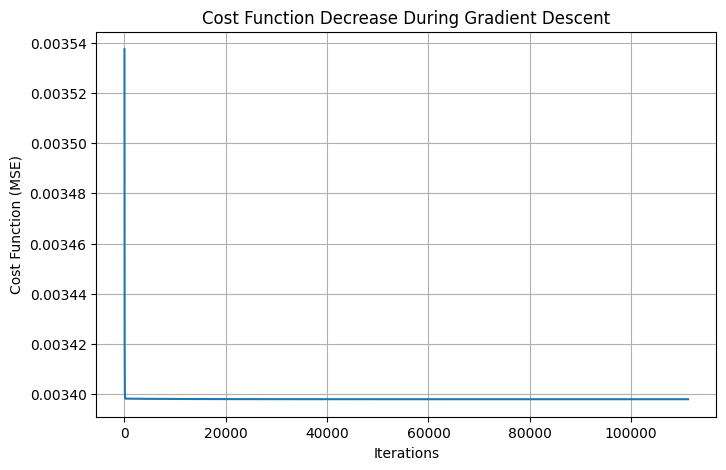

In [15]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(L)), L)
plt.xlabel("Iterations")
plt.ylabel("Cost Function (MSE)")
plt.title("Cost Function Decrease During Gradient Descent")
plt.grid(True)
plt.show()

# 7. 3D Trajectory of Weight Updates

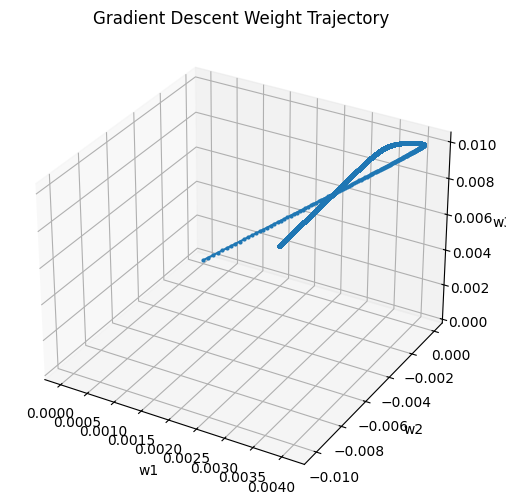

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(W1, W2, W3, marker='o', markersize=2, linestyle='-')
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("w3")
ax.set_title("Gradient Descent Weight Trajectory")

plt.show()

# 8. Comparison with scikit‑learn

In [18]:
# Prepare data for sklearn
X = np.column_stack((x1, x2))

# Train model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predictions
y_pred_sklearn = lr_model.predict(X)

# MSE
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("Linear Regression with scikit-learn")
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("MSE:", mse_sklearn)

Linear Regression with scikit-learn
Coefficients: [ 0.00375661 -0.01028322]
Intercept: 0.010302248672018146
MSE: 0.003397962884033206


# 9. Conclusions

- The gradient descent implementation successfully converges to the same solution as scikit-learn.
- The cost function decreases smoothly and stabilizes after sufficient iterations.
- The 3D trajectory plot shows how the weights evolve during optimization.
- This confirms the correctness of the mathematical formulation and the implementation.
